# Introduction to GeoPandas

## Outline

---

- What is GeoPandas
- Exercises

## What is GeoPandas
---

GeoPandas extends the functionalities of Pandas to geospatial data, which is time-based data that is related to a location on the surface of Earth.

### How to import GeoPandas

In [1]:
!pip install geopandas

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [3]:
import geopandas as gpd

### Data structure

The basic data structure provided by GeoPandas are `GeoSeries` and `GeoDataFrame`. A `GeoDataFrame` is a subclass of Pandas `DataFrame`, that can store geometry columns and perform spatial operations. The basic structure of `GeoDataFrame` is shown below

<img src="img/geodataframe.png" width="500">

There are two main `models` (i.e. a simplified version of the represented objects) for storing geospatial data
- vector
- raster

#### Vector

A `vector` data model stores locations as discrete geometric objects. The ones available are shown in the image below taken from this [link](https://r-spatial.org/book/03-Geometries.html). For example, a `POINT()` is represented by a longitude and latitude coordinate pair, whereas a `POLYGON` is a set of `POINT()` that delimit a closed area.

<img src="img/geometry.png" width="500">

Areas are occasionally represented with a `centroid`, which is the point that is mathematically equidistant from all points of the area.

#### Raster

Raster data is instead stored on a grid of pixels. Each pixel encodes the necessary properties that characterize the given area, as elevation or temperature.

### Working with geospatial information

Geospatial information are usually contained in files with format `GeoPackage`, `GeoJSON` or `Shapefile`. Such files can be read in with the command below. The command detects the filetype and reads the data into a `GeoDataFrame`. The file below contains the shapes of the countries that belong to the [Eastern Africa Power Pool](https://eappool.org/).

In [5]:
import pathlib
file_path = pathlib.Path(pathlib.Path.cwd(), "shapes", "country_shapes.geojson")
country_shapes = gpd.read_file(file_path)
country_shapes.head(1)

,name,geometry
0,RW,"POLYGON ((29.71332 -2.81759, 29.64864 -2.78703..."


A Coordinate Reference System (CRS) is a framework used to precisely measure locations on the surface of Earth as coordinates. This [website](https://epsg.io/) provides a comparison and further information on the main CRS. The CRS used in the `GeoDataFrame` can be viewed with

In [24]:
country_shapes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The snippet below changes (technically speaking `re-projects`) the `GeoDataFrame` content to a different CRS

In [25]:
#country_shapes = country_shapes.set_index("name")
country_shapes = country_shapes.to_crs(3857)
country_shapes.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The snippet below computes the area and the centroid of each country

In [34]:
country_shapes["area"] = country_shapes.area
country_shapes["centroid"] = country_shapes.centroid

To plot the areas

<AxesSubplot:>

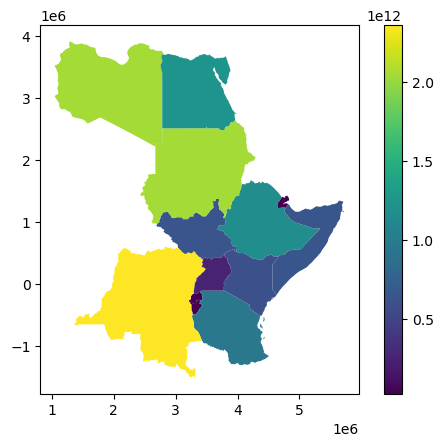

In [31]:
country_shapes.plot("area", legend=True)

To plot the centroids instead

<AxesSubplot:>

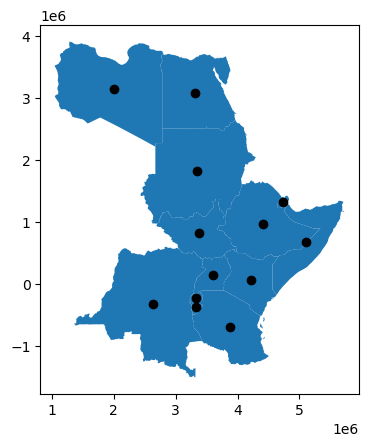

In [36]:
ax = country_shapes["geometry"].plot()
country_shapes["centroid"].plot(ax=ax, color="black")

Finally it is possible to compute the distances between two centroids. The snippet below computes the distances of all centroids from the one of Ruanda. Finally the code sorts the `GeoDataFrame` in ascending order by the distance. Indeed the centroid of Lybia is the farthest away from the reference one.

In [51]:
rw_centroid = country_shapes["centroid"].iloc[0]
country_shapes["distance"] = country_shapes["centroid"].distance(rw_centroid)
country_shapes.sort_values(by=["distance"])

,name,geometry,area,centroid,distance
0,RW,"POLYGON ((3307671.415 -313779.098, 3300471.047...",2.549226e+10,POINT (3331371.259 -222829.414),0.000000e+00
1,BI,"POLYGON ((3347951.181 -464888.650, 3344283.903...",2.720861e+10,POINT (3327253.961 -375160.842),1.523871e+05
10,UG,"POLYGON ((3329705.238 -164422.844, 3326843.733...",2.433766e+11,POINT (3605806.944 142664.957),4.570570e+05
6,CD,"POLYGON ((3033359.353 -1322343.844, 3030191.38...",2.364220e+12,POINT (2634266.553 -323921.334),7.043966e+05
3,TZ,"MULTIPOLYGON (((4381074.905 -1242490.884, 4368...",9.597807e+11,POINT (3877290.265 -701264.946),7.258981e+05
11,KE,"MULTIPOLYGON (((4365872.429 -521084.298, 42062...",5.908059e+11,POINT (4212958.685 61792.120),9.263940e+05
4,SS,"POLYGON ((3316840.461 488534.902, 3317990.839 ...",6.432377e+11,POINT (3375206.183 814705.561),1.038461e+06
2,ET,"POLYGON ((4278808.955 401154.512, 4251119.642 ...",1.164816e+12,POINT (4410402.754 967675.452),1.606739e+06
5,SO,"POLYGON ((4564577.685 -91683.441, 4564156.450 ...",6.475513e+11,POINT (5107411.094 680504.321),1.992569e+06
8,SD,"POLYGON ((2699793.845 973547.547, 2694586.148 ...",2.046145e+12,POINT (3342196.368 1820749.565),2.043608e+06


### Additional source of geospatial data

The package `geodatasets` offers ready-to-use geospatial datasets. The package can be installed with the command

In [2]:
!pip install geodatasets

  Using cached geodatasets-2024.7.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
Using cached geodatasets-2024.7.0-py3-none-any.whl (19 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)


and imported with the command

In [56]:
import geodatasets as gds

A dataset (for example the one from Nepal) can be accessed with the snippet below

In [57]:
path_to_data = gds.get_path("geoda nepal")
gdf_nepal = gpd.read_file(path_to_data)
gdf_nepal.head(2)

,id,name_1,name_2,district,depecprov,povindex,pcinc,pcincppp,pcincmp,malkids,...,HEALTDAMT,HUMDAMT,INDDAMT,MULTDAMT,SOCDAMT,TOURDAMT,TRANDAMT,WATDAMT,TOTDAMT,geometry
0,1,None,Dhaualagiri,Baglung,27.01,27.33,354,573,25613,42.9,...,3584409,172736,369324,8050858,1308661,0,15421,1996315,32542286,"POLYGON ((83.10834 28.62020, 83.10560 28.60976..."
1,2,None,Dhaualagiri,Mustang,31.51,31.16,1189,1922,85957,54.7,...,2253911,172736,0,3712798,633763,0,15421,0,14427364,"POLYGON ((83.99726 29.31675, 84.00000 29.31576..."


In [ ]:
gdf_nepal = gdf_nepal.set_index("district")
gdf_nepal = gdf_nepal.to_crs(3857)

## Exercises
---

**Exercise 1** - write a program that computes the area of the districts of Nepal. Plot the results afterwards.

In [62]:
# please provide your code here

In [62]:
# please provide your code here

**Exercise 2** - write a program that computes the centroid of the districts of Nepal. Plot the results afterwards.

In [63]:
# please provide your code here

In [62]:
# please provide your code here

**Exercise 3** - write a program that computes the distances of the centroids from a reference centroid (choose one).

In [62]:
# please provide your code here